# Regalii data set
Using actual Regalii data from Jan-May 2016, construct features that correspond to some of the features in the Lending Club data set

In [2]:
%matplotlib inline

#import libraries
from __future__ import absolute_import, division, print_function
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.ensemble as ske
import sklearn.preprocessing as skp
import math
import sigopt
import seaborn as sb
import csv
import datetime as dt
import re


/Users/amar/anaconda/envs/my_projects_env/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
#Load data sets for all months and merge into one dataframe

#Load Jan data (note this data set will be used as "ground truth" for how many 
#columns the later months' data sets should have)
data = list()
with open('regalii_jan.csv') as regalii_file:
    reader = csv.reader(regalii_file)
    for line in reader:
        #Eliminate cells which were not filled with valid data in certain lines (valid data was listed in extra cells at ends of lines)
        line = [x.strip() for x in line if not x.startswith('\\') and not x.startswith('{\\"label') and x.find('\\\\r') == -1]
        data.append(line)
        
data = np.array(data)
df_jan = pd.DataFrame(data[1:,1:], index=data[1:,0], columns=data[0,1:])
#Convert 'created_at' column to datetime type for later use
df_jan['created_at'] = pd.to_datetime(df_jan['created_at'])

#Set options so that all columns can be displayed if needed
pd.options.display.max_columns = len(df_jan.columns)

#Load Feb data
data = list()
with open('regalii_feb.csv') as regalii_file:
    reader = csv.reader(regalii_file)
    for line in reader:
        line = [x.strip() for x in line if not x.startswith('\\') and not x.startswith('{\\"label') and x.find('\\\\r') == -1]
        #Remove blank cells that are appended to end of lines
        i = len(line)
        while line[i-1] == '' and i > len(df_jan.columns)+1:
            i -= 1
        line = line[:i]
        #Only keep lines with mostly non-missing data
        if line.count('') < len(df_jan.columns)/2:
            data.append(line)
        
data = np.array(data)
df_feb = pd.DataFrame(data[1:,1:], index=data[1:,0], columns=data[0,1:])
#Convert 'created_at' column to datetime type for later use
df_feb['created_at'] = pd.to_datetime(df_feb['created_at'])

#Load March data
data = list()
with open('regalii_mar.csv') as regalii_file:
    reader = csv.reader(regalii_file)
    for line in reader:
        line = [x.strip() for x in line if not x.startswith('\\') and not x.startswith('{\\"label') and x.find('\\\\r') == -1]
        #Remove blank cells that are appended to end of lines
        i = len(line)
        while line[i-1] == '' and i > len(df_jan.columns)+1:
            i -= 1
        line = line[:i]
        #Only keep lines with mostly non-missing data
        if line.count('') < len(df_jan.columns)/2:
            data.append(line)
        
data = np.array(data)
df_mar = pd.DataFrame(data[1:,1:], index=data[1:,0], columns=data[0,1:])
#Convert 'created_at' column to datetime type for later use
df_mar['created_at'] = pd.to_datetime(df_mar['created_at'], dayfirst=True)

#Load April data
data = list()
with open('regalii_apr.csv') as regalii_file:
    reader = csv.reader(regalii_file)
    for line in reader:
        line = [x.strip() for x in line if not x.startswith('\\') and not x.startswith('{\\"label') and x.find('\\\\r') == -1]
        #Remove blank cells that are appended to end of lines in this data set
        i = len(line)
        while line[i-1] == '' and i > len(df_jan.columns)+1:
            i -= 1
        line = line[:i]
        #Only keep lines with mostly non-missing data
        if line.count('') < len(df_jan.columns)/2:
            data.append(line)
        
data = np.array(data)
df_apr = pd.DataFrame(data[1:,1:], index=data[1:,0], columns=data[0,1:])
#Convert 'created_at' column to datetime type for later use
df_apr['created_at'] = pd.to_datetime(df_apr['created_at'])

#Load May data
data = list()
with open('regalii_may.csv') as regalii_file:
    reader = csv.reader(regalii_file)
    for line in reader:
        line = [x.strip() for x in line if not x.startswith('\\') and not x.startswith('{\\"label') and x.find('\\\\r') == -1]
        #Remove blank cells that are appended to end of lines in this data set
        i = len(line)
        while line[i-1] == '' and i > len(df_jan.columns)+1:
            i -= 1
        line = line[:i]
        #Only keep lines with mostly non-missing data
        if line.count('') < len(df_jan.columns)/2:
            data.append(line)
        
data = np.array(data)
df_may = pd.DataFrame(data[1:,1:], index=data[1:,0], columns=data[0,1:])
#Convert 'created_at' column to datetime type for later use
df_may['created_at'] = pd.to_datetime(df_may['created_at'])

#Concatenate all monthly dataframes into one dataframe, dropping any columns 
#that do not exist in all monthly dataframes
frames = [df_jan, df_feb, df_mar, df_apr, df_may]
df = pd.concat(frames, axis=0, join='inner')

del frames, df_jan, df_feb, df_mar, df_apr, df_may, data

In [322]:
print('Number of columns: ',len(df.columns))
print('Columns :', df.columns)

Number of columns:  62
Columns : Index([u'bill_amount', u'bill_currency', u'bill_amount_usd', u'bill_fee_usd',
       u'merchant_earned', u'processor_pay_status', u'account_number',
       u'processor_auth_number', u'processor_dv',
       u'processor_confirmation_message', u'customer_id', u'company_id',
       u'user_id', u'created_at', u'updated_at', u'bill_type',
       u'regalii_earned_total', u'merchant_starting_balance',
       u'merchant_ending_balance', u'bill_discount', u'processor_amount_usd',
       u'bill_total_usd', u'merchant_paid', u'store_id', u'chain_id',
       u'sales_rep_id', u'invoice_id', u'is_refunded', u'processor_comision',
       u'processor_transaction_id', u'name_on_account', u'local_currency',
       u'bill_fx_rate', u'bill_amount_local_currency', u'invoice_number',
       u'customer_bill_id', u'pos_number', u'external_id', u'fx_delta',
       u'processor_id', u'processor_amount', u'processor_currency',
       u'processor_fx_rate', u'processor_starting_balan

In [323]:
#Grab 'bill_total_usd' column and strip '$' from the front of all entries where it occurs
#and convert column to being numeric
df['bill_total_usd'] = df['bill_total_usd'].apply(lambda x: x.lstrip('$'))
df['bill_total_usd'] = pd.to_numeric(df['bill_total_usd'])

#For each unique user, count how many transactions they had and the total $ amount of transactions, 
#and then calculate the median $/transaction. Add all these features to a new dataframe
total_bill = df.groupby('user_id')['bill_total_usd'].sum().rename('total_payment')
total_transactions = df.groupby('user_id')['bill_total_usd'].count().rename('total_transactions')
avg_transaction_amount = df.groupby('user_id')['bill_total_usd'].mean().rename('avg_payment')
median_transaction_amount = df.groupby('user_id')['bill_total_usd'].median().rename('median_payment')
df_agg = pd.concat([total_bill, total_transactions, avg_transaction_amount, median_transaction_amount], axis=1, join='outer')

del total_bill, total_transactions, avg_transaction_amount, median_transaction_amount

#For each user, count how many different billing accounts they use Regalii to pay for and add to dataframe
total_accounts = df.groupby('user_id')['account_number'].nunique()
df_agg['total_accounts'] = total_accounts

del total_accounts

#For each user, count how many different billing accounts they have paid in approximately the last month 
#(relates to 'open_acc' in Lending Club data)
df['created_at'] = pd.to_datetime(df['created_at'])
one_month_ago = pd.to_datetime(dt.datetime.today().strftime('%m/%d/%Y')) - pd.tseries.offsets.DateOffset(months=1, days=10)
recent_transactions = df[df['created_at'] > one_month_ago]
recent_accounts = recent_transactions.groupby('user_id')['account_number'].nunique()
df_agg['recent_accounts'] = recent_accounts
df_agg.loc[:,'recent_accounts'].fillna(0, inplace=True)

del one_month_ago, recent_transactions, recent_accounts

#For each user, calculate the avg and median payments per month
tmp = df.groupby([df['user_id'], df['created_at'].dt.month]).sum()
df_agg['avg_monthly_payment'] = tmp.groupby(level=0).mean()
df_agg['median_monthly_payment'] = tmp.groupby(level=0).median()

del tmp


#Show sample of entries from resulting dataframe
df_agg.head(n=10)

,total_payment,total_transactions,avg_payment,median_payment,total_accounts,recent_accounts,avg_monthly_payment,median_monthly_payment
user_id,,,,,,,,
1,9671.0022,813,11.895452,9.0000,414,121.0,1611.833700,1857.17500
1001,7447.0509,614,12.128747,7.0000,364,108.0,1489.410180,1611.36000
10041,1079.7025,52,20.763510,16.8450,27,6.0,215.940500,205.08000
10091,155.4019,6,25.900317,22.6431,3,1.0,38.850475,32.72595
1031,586.3345,5,117.266900,87.1800,2,1.0,146.583625,104.98000
10391,564.3878,11,51.307982,58.0300,4,1.0,141.096950,142.75500
1041,3599.4272,140,25.710194,18.9050,51,23.0,719.885440,712.34000
1051,6883.8790,254,27.101886,21.6469,109,54.0,1376.775800,1482.30000
10521,22.0000,1,22.000000,22.0000,1,NaN,22.000000,22.00000


In [329]:
df_agg.head(n=10)

,total_payment,total_transactions,avg_payment,median_payment,total_accounts,recent_accounts,avg_monthly_payment,median_monthly_payment
user_id,,,,,,,,
1,9671.0022,813,11.895452,9.0000,414,121.0,1611.833700,1857.17500
1001,7447.0509,614,12.128747,7.0000,364,108.0,1489.410180,1611.36000
10041,1079.7025,52,20.763510,16.8450,27,6.0,215.940500,205.08000
10091,155.4019,6,25.900317,22.6431,3,1.0,38.850475,32.72595
1031,586.3345,5,117.266900,87.1800,2,1.0,146.583625,104.98000
10391,564.3878,11,51.307982,58.0300,4,1.0,141.096950,142.75500
1041,3599.4272,140,25.710194,18.9050,51,23.0,719.885440,712.34000
1051,6883.8790,254,27.101886,21.6469,109,54.0,1376.775800,1482.30000
10521,22.0000,1,22.000000,22.0000,1,0.0,22.000000,22.00000


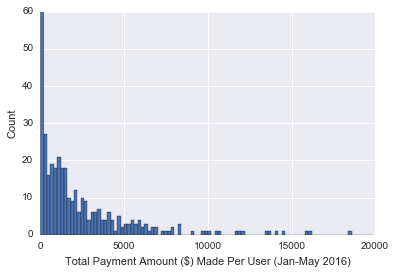

In [358]:
#Plot of 'total_payment' distribution
bins = np.concatenate((np.arange(0,20000,200), [np.inf]))
fig1 = plt.figure()
n1,_,_ = plt.hist(df_agg['total_payment'], bins)
plt.xlabel('Total Payment Amount ($) Made Per User (Jan-May 2016)')
plt.ylabel('Count')

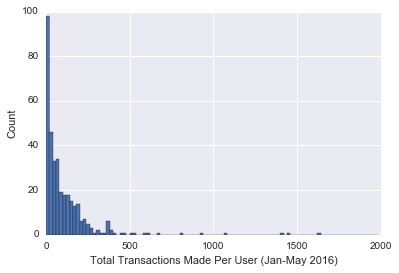

In [357]:
#Plot of 'total_transactions' distribution
bins = np.concatenate((np.arange(0,2000,20), [np.inf]))
fig2 = plt.figure()
n2,_,_ = plt.hist(df_agg['total_transactions'], bins)
plt.xlabel('Total Transactions Made Per User (Jan-May 2016)')
plt.ylabel('Count')

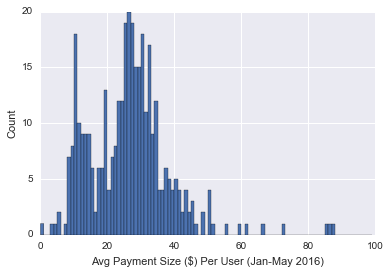

In [359]:
#Plot of 'avg_payment' distribution
bins = np.concatenate((np.arange(0,100,1), [np.inf]))
fig3 = plt.figure()
n3,_,_ = plt.hist(df_agg['avg_payment'], bins)
plt.xlabel('Avg Payment Size ($) Per User (Jan-May 2016)')
plt.ylabel('Count')

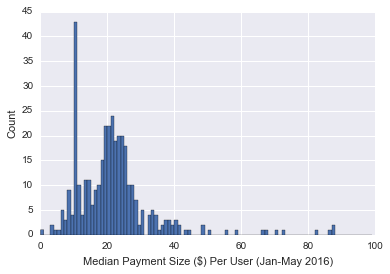

In [360]:
#Plot of 'median_payment' distribution
bins = np.concatenate((np.arange(0,100,1), [np.inf]))
fig4 = plt.figure()
n4,_,_ = plt.hist(df_agg['median_payment'], bins)
plt.xlabel('Median Payment Size ($) Per User (Jan-May 2016)')
plt.ylabel('Count')

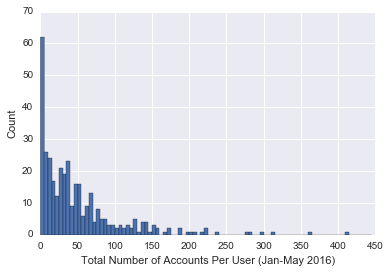

In [347]:
#Plot of 'total_accounts' distribution
bins = np.concatenate((np.arange(0,450,5), [np.inf]))
fig5 = plt.figure()
n5,_,_ = plt.hist(df_agg['total_accounts'], bins)
plt.xlabel('Total Number of Accounts Per User (Jan-May 2016)')
plt.ylabel('Count')

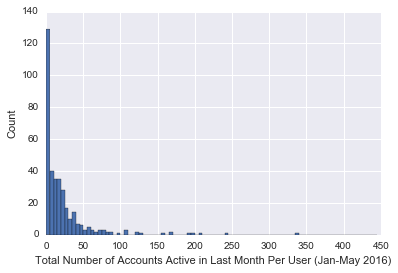

In [354]:
#Plot of 'recent_accounts' distribution
bins = np.concatenate((np.arange(0,450,5), [np.inf]))
fig6 = plt.figure()
n6,_,_ = plt.hist(df_agg['recent_accounts'], bins)
plt.xlabel('Total Number of Accounts Active in Last Month Per User (Jan-May 2016)')
plt.ylabel('Count')

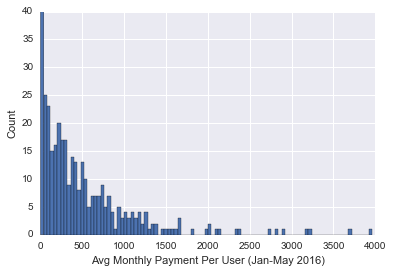

In [355]:
#Plot of 'avg_monthly_payment' distribution
bins = np.concatenate((np.arange(0,4000,40), [np.inf]))
fig7 = plt.figure()
n7,_,_ = plt.hist(df_agg['avg_monthly_payment'], bins)
plt.xlabel('Avg Monthly Payment Per User (Jan-May 2016)')
plt.ylabel('Count')

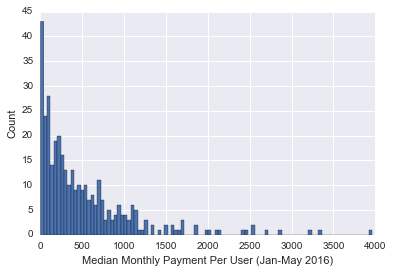

In [364]:
#Plot of 'median_monthly_payment' distribution
bins = np.concatenate((np.arange(0,4000,40), [np.inf]))
fig8 = plt.figure()
n8,_,_ = plt.hist(df_agg['median_monthly_payment'], bins)
plt.xlabel('Median Monthly Payment Per User (Jan-May 2016)')
plt.ylabel('Count')